#kaggle competition:

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium. The data used in this context is 'Insurance_data'.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#provide the folder name/filename.csv in the folder to read the data
data = pd.read_csv("insurance-premium-prediction/insurance.csv")
data.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
#spliting the data into features(x_data) and target(y_data)
x_data = data.drop('expenses', axis ='columns')
y_data = data['expenses']

In [4]:
x_data.head()

age     sex   bmi  children smoker     region
0   19  female  27.9         0    yes  southwest
1   18    male  33.8         1     no  southeast
2   28    male  33.0         3     no  southeast
3   33    male  22.7         0     no  northwest
4   32    male  28.9         0     no  northwest

In [5]:
y_data.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [6]:
print(x_data.info()) #checking the information of the x_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB
None


In [7]:
#the data contains 1338rows and 7coloumns
x_data.shape

(1338, 6)

In [8]:
y_data.shape #have a look on expenses column of the data

(1338,)

In [9]:
#firstly:encoding the catogrical features using 'one_hot coding'
x_data_onehot = pd.get_dummies(x_data, columns=['sex', 'smoker', 'region'], prefix=['sex-encoding','smoker-encoding','region-encoding'])
x_data_onehot.head()

age   bmi  children  sex-encoding_female  sex-encoding_male  \
0   19  27.9         0                    1                  0   
1   18  33.8         1                    0                  1   
2   28  33.0         3                    0                  1   
3   33  22.7         0                    0                  1   
4   32  28.9         0                    0                  1   

   smoker-encoding_no  smoker-encoding_yes  region-encoding_northeast  \
0                   0                    1                          0   
1                   1                    0                          0   
2                   1                    0                          0   
3                   1                    0                          0   
4                   1                    0                          0   

   region-encoding_northwest  region-encoding_southeast  \
0                          0                          0   
1                          0                          1   
2                          0                          1   
3                          1                          0   
4                          1                          0   

   region-encoding_southwest  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0

In [10]:
#secondly:scaling the numerical features
from sklearn import preprocessing

#create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

#scale numerical_features
scaled_x_features = minmax_scale.fit_transform(x_data_onehot)

#show features
print(scaled_x_features)

[[0.02173913 0.32075472 0.         ... 0.         0.         1.        ]
 [0.         0.47978437 0.2        ... 0.         1.         0.        ]
 [0.2173913  0.45822102 0.6        ... 0.         1.         0.        ]
 ...
 [0.         0.56334232 0.         ... 0.         1.         0.        ]
 [0.06521739 0.26415094 0.         ... 0.         0.         1.        ]
 [0.93478261 0.35309973 0.         ... 1.         0.         0.        ]]


/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(scaled_x_features, y_data, test_size=0.33, random_state=42) 

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(896, 11)
(896,)
(442, 11)
(442,)


In [24]:
#set a model 'linear regression'
from sklearn import linear_model
#instantiate the model
lm = linear_model.LinearRegression()

#fit the model on training sets(x_train, y_train)
model = lm.fit(X_train, y_train)

#Predict on X_test(Generalization)
predictions = lm.predict(X_test)

In [25]:
print(model.score(X_test, y_test))

0.7603096573731459


In [27]:
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
print(RMSE)

# RMSE = np.sqrt(mean_squared_error(y_test,predictions))
# print(RMSE)

5926.663415236362


Text(0, 0.5, 'predictions')

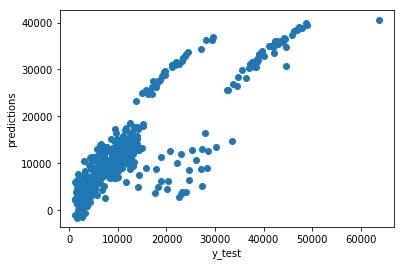

In [29]:
#plotting
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [33]:
d = {'Actual':y_test, 'Predicted':predictions}
df = pd.DataFrame(data=d)
df.head()

Actual  Predicted
764    9095.07     8960.0
887    5272.18     7168.0
890   29330.98    36352.0
1293   9301.89     9600.0
259   33750.29    26880.0

In [44]:
GradientBoostingRegressor

sklearn.ensemble.gradient_boosting.GradientBoostingRegressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(random_state=4)
lmGB = GB.fit(X_train, y_train)
predictions2 = lm.predict(X_test)

In [36]:
print(lmGB.score(X_test, y_test))

0.8595239029601245


In [38]:
RMSE = np.sqrt(mean_squared_error(y_test,predictions2))
print(RMSE)

5926.663415236362


In [41]:
d2 = {'Actual':y_test,'Predicted':predictions2}
df = pd.DataFrame(data=d2)
df.head()

Actual  Predicted
764    9095.07     8960.0
887    5272.18     7168.0
890   29330.98    36352.0
1293   9301.89     9600.0
259   33750.29    26880.0